In [44]:
from ObatiningStockData import *
from LinearRegressionModel import *
from matplotlib import pyplot as plt
import plotly.express as px

In [35]:
symbol = "KPITTECH.NS"
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2024, 2, 25)

In [36]:
ftse_lags = create_lagged_series(symbol, start_date, end_date, lags=5)
print(ftse_lags.head(5))

[*********************100%%**********************]  1 of 1 completed

             Volume     Today      Lag1      Lag2      Lag3  Lag4  Lag5  \
Date                                                                      
2023-01-02   404987       NaN       NaN       NaN       NaN   NaN   NaN   
2023-01-03   524130 -0.717619       NaN       NaN       NaN   NaN   NaN   
2023-01-04   838579 -1.532339 -0.717619       NaN       NaN   NaN   NaN   
2023-01-05   571885  0.227554 -1.532339 -0.717619       NaN   NaN   NaN   
2023-01-06  2688877  4.972895  0.227554 -1.532339 -0.717619   NaN   NaN   

            Direction  
Date                   
2023-01-02        NaN  
2023-01-03       -1.0  
2023-01-04       -1.0  
2023-01-05        1.0  
2023-01-06        1.0  


In [37]:
y_pred, y_test = create_linear_reg(ftse_lags)
print(y_pred)

[ 0.41340393  0.24496756  0.34939187  0.55084036  0.38020572  0.08437798
  0.05093452  0.88749331  0.21629231  0.39412567  0.5058117   0.53686417
  0.1110047   0.26101947  0.02318158  0.31428501  0.26855045  0.07802484
  0.41431003  0.26274048  0.59758547 -0.08334619  0.27172392  0.30927767
  0.17527798 -0.03547659  0.36920677  0.44918685  0.46146517  0.3666459
  0.35850792  0.04733352  0.31547982  0.33096594  0.39601276  0.40625906
  0.49230981 -0.07561704  0.32218063  0.46434712  0.51754495  0.27533492
  0.46370155 -0.03093842  0.3631397   0.2169778  -0.14864617  0.20945471
  0.18397461  0.27415584  0.3788045   0.34782561  0.35485591  0.49079427
  0.32031183  0.29126427]


In [38]:
df_pred = evaluate_model(y_test, y_pred)
print(df_pred.head(5))

        Date    Actual  Predicted
0 2023-02-22 -1.307629   0.413404
1 2023-07-17  2.586659   0.244968
2 2023-12-04  0.957489   0.349392
3 2023-08-08 -0.338841   0.550840
4 2024-01-24  0.336332   0.380206


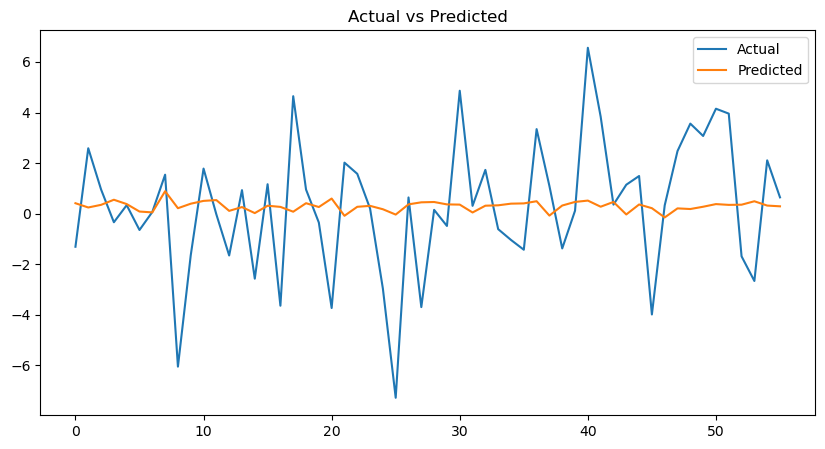

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(df_pred["Actual"], label="Actual")
plt.plot(df_pred["Predicted"], label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [45]:
fig = px.line(df_pred, labels= {"value": "Close Price"}, title = "Linear Regression Model: Actual Prices vs. Predicted Prices.")
fig.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [40]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# R2 score
r2 = r2_score(y_test, y_pred)

print("R2 Score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

R2 Score:  0.008699368181967038
Mean Squared Error:  6.942837997274408
Mean Absolute Error:  2.013335038727223
